In [133]:
import pickle
import numpy as np
import math
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

__Load Data__

In [79]:
with open('train.p', 'rb') as f:
    data = pickle.load(f)
type(data)

dict

In [80]:
print(data.keys())

dict_keys(['features', 'labels'])


In [114]:
# Load the feature data to the variable X_train
x_data = data['features']
# Load the label data to the variable y_train
y_data = data['labels']

print(x_data.shape)
print(y_data.shape)
print(y_data[-1])
type(x_data)

(39209, 32, 32, 3)
(39209,)
42


numpy.ndarray

In [115]:
x_data[0].shape

(32, 32, 3)

In [116]:
with open('test.p', 'rb') as f:
    test = pickle.load(f)

In [117]:
x_test = test['features']
y_test = test['labels']

In [118]:
import matplotlib.pyplot as plt

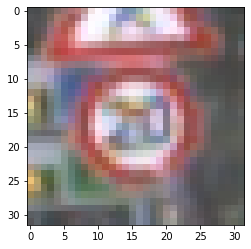

In [119]:
plt.imshow(x_data[0])

In [120]:
x_data.dtype

dtype('uint8')

In [121]:
np.unique(y_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

__Data Preparation__

__1. Reshaping data__

y_train contains 43 distinct classes. Shape needs to be (39209, 43). Each image's label is represented as a 43-d **One-hot encoded vector**.

__2.Rescaling(Normalisation)__
The value of each pixel is between 0-255, so we will **rescale each pixel** by dividing by 255 so that the range becomes 0-1.

__3.Converting Input Data Type: Int to Float__
The pixels are originally stored as type 'int', converting it to float. 

In [122]:
# convert class labels (from digits) to one-hot encoded vectors
y_data = keras.utils.to_categorical(y_data, 43)
y_data.shape

(39209, 43)

In [124]:
y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [125]:
y_test = keras.utils.to_categorical(y_test, 43)

In [131]:
# convert int to float
x_data = x_data.astype('float32')
x_test = x_test.astype('float32')

# normalise
x_data /= 255
x_test /= 255

__Building Model__

In [132]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

__Model Fitting and evaluation__

In [138]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size = 0.3)

In [141]:
x_train.shape, y_train.shape

((27446, 32, 32, 3), (27446, 43))

In [143]:
model.compile(loss = keras.losses.categorical_crossentropy,\
             optimizer = 'adam',
             metrics = ['accuracy'])

In [144]:
model.fit(x_train, y_train, batch_size = 128, epochs = 12, verbose = 1, validation_data = (x_validation, y_validation))

Epoch 1/12
215/215 [==============================] - 44s 201ms/step - loss: 1.9911 - accuracy: 0.4690 - val_loss: 0.5505 - val_accuracy: 0.8801
Epoch 2/12
215/215 [==============================] - 49s 226ms/step - loss: 0.7446 - accuracy: 0.7744 - val_loss: 0.2554 - val_accuracy: 0.9458
Epoch 3/12
215/215 [==============================] - 51s 238ms/step - loss: 0.4996 - accuracy: 0.8469 - val_loss: 0.1601 - val_accuracy: 0.9670
Epoch 4/12
215/215 [==============================] - 48s 225ms/step - loss: 0.3867 - accuracy: 0.8787 - val_loss: 0.1163 - val_accuracy: 0.9748
Epoch 5/12
215/215 [==============================] - 47s 220ms/step - loss: 0.3212 - accuracy: 0.8978 - val_loss: 0.0910 - val_accuracy: 0.9795
Epoch 6/12
215/215 [==============================] - 47s 220ms/step - loss: 0.2654 - accuracy: 0.9167 - val_loss: 0.0770 - val_accuracy: 0.9829
Epoch 7/12
215/215 [==============================] - 47s 220ms/step - loss: 0.2393 - accuracy: 0.9225 - val_loss: 0.0664 - val_ac

In [146]:
model.evaluate(x_test, y_test)

395/395 [==============================] - 4s 10ms/step - loss: 0.1539 - accuracy: 0.9610


[0.15388108789920807, 0.9610451459884644]